###  Prediction Model for Delivery Time

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

#### Read The Data

In [3]:
df = pd.read_csv('Delivery_ Time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

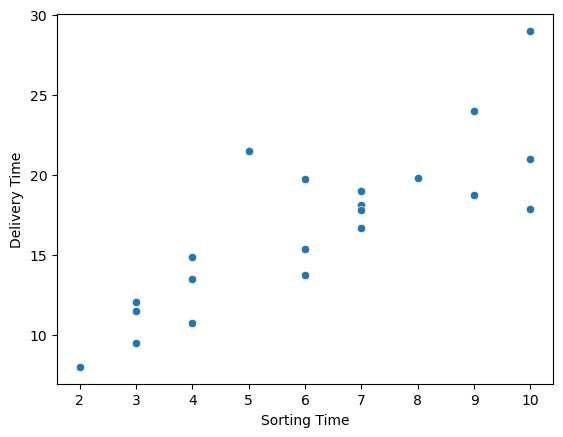

In [6]:
sns.scatterplot(x=df['Sorting Time'],y=df['Delivery Time'])

<Axes: xlabel='Delivery Time', ylabel='Density'>

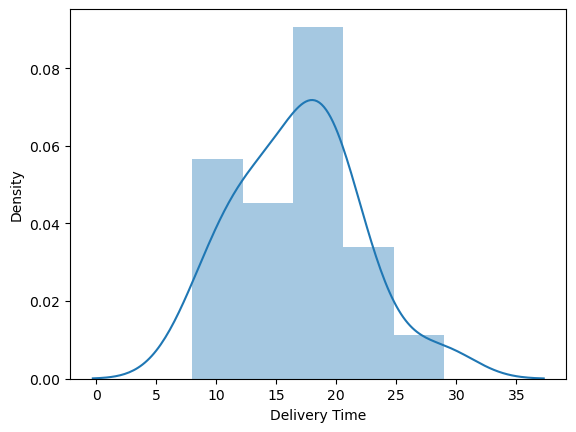

In [7]:
import seaborn as sns
sns.distplot(df['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

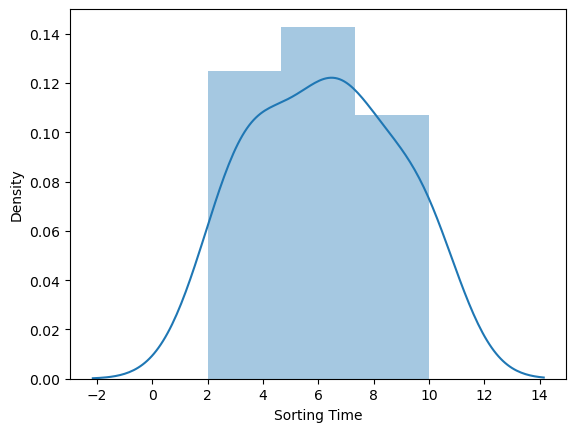

In [8]:
sns.distplot(df['Sorting Time'])

In [9]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### Build The Model

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols("Q('Delivery Time') ~ Q('Sorting Time')", data=df).fit()

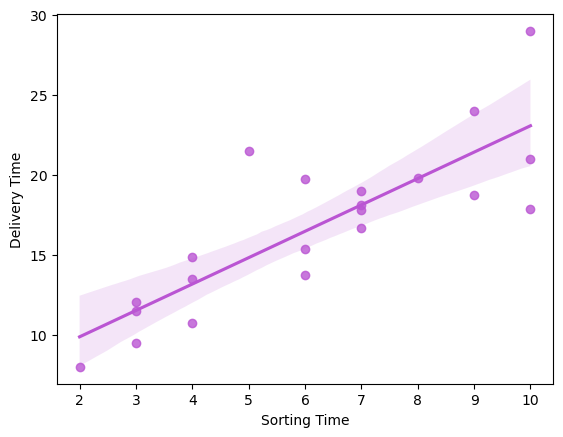

In [12]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=df, color='mediumorchid');

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Q('Delivery Time')   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        19:51:41   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5827      1.72

In [14]:
model.params

Intercept            6.582734
Q('Sorting Time')    1.649020
dtype: float64

#### Predict New Data 

In [15]:
new_df=pd.Series([11.45,12])

In [16]:
data_pred=pd.DataFrame(new_df,columns=['Sorting Time'])
data_pred

,Sorting Time
0,11.45
1,12.00


In [17]:
# Delivery Time for The Input Value Of Sorting Time
model.predict(data_pred)

0    25.464012
1    26.370973
dtype: float64

#### Apply Transformations

#### 1. Log Transformation

In [18]:
df['DeliveryTime_log'] = np.log(df['Delivery Time'])
df['SortingTime_log'] = np.log(df['Sorting Time'])

In [19]:
model_log = smf.ols("Q('DeliveryTime_log') ~ Q('SortingTime_log')", data=df).fit()

In [20]:
print(model_log.summary())

                              OLS Regression Results                             
Dep. Variable:     Q('DeliveryTime_log')   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 06 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           19:51:41   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
In

#### 2. Square Root Transformation

In [21]:
df['DeliveryTime_sqrt'] = np.sqrt(df['Delivery Time'])
df['SortingTime_sqrt'] = np.sqrt(df['Sorting Time'])

In [22]:
model_sqrt = smf.ols("Q('DeliveryTime_sqrt') ~ Q('SortingTime_sqrt')", data=df).fit()

In [23]:
print(model_sqrt.summary())

                              OLS Regression Results                              
Dep. Variable:     Q('DeliveryTime_sqrt')   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Tue, 06 Feb 2024   Prob (F-statistic):           8.48e-07
Time:                            19:51:41   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### 3 .Standardized Data Transformation

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
scaler = StandardScaler()
df[['DeliveryTime_std','SortingTime_std']] = scaler.fit_transform(df[['Delivery Time','Sorting Time']])

In [26]:
model_standardized = smf.ols("Q('DeliveryTime_std') ~ Q('SortingTime_std')", data=df).fit()

In [27]:
print(model_standardized.summary())

                              OLS Regression Results                             
Dep. Variable:     Q('DeliveryTime_std')   R-squared:                       0.682
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     40.80
Date:                   Tue, 06 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                           19:51:41   Log-Likelihood:                -17.759
No. Observations:                     21   AIC:                             39.52
Df Residuals:                         19   BIC:                             41.61
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
In

#### 4. Scale Features (between 0 and 1) Transformation

In [28]:
min_max_scaler = MinMaxScaler()
df[['DeliveryTime_minmax', 'SortingTime_minmax']] = min_max_scaler.fit_transform(df[['Delivery Time', 'Sorting Time']])

In [29]:
model_scaled = smf.ols("Q('DeliveryTime_minmax') ~ Q('SortingTime_minmax')", data=df).fit()

In [30]:
print(model_scaled.summary())

                               OLS Regression Results                               
Dep. Variable:     Q('DeliveryTime_minmax')   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.666
Method:                       Least Squares   F-statistic:                     40.80
Date:                      Tue, 06 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                              19:51:41   Log-Likelihood:                 12.578
No. Observations:                        21   AIC:                            -21.16
Df Residuals:                            19   BIC:                            -19.07
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### Salary Hike Prediction Model

#### Read The Data

In [31]:
df1=pd.read_csv('Salary_Data.csv')
df1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [33]:
df1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='YearsExperience', ylabel='Density'>

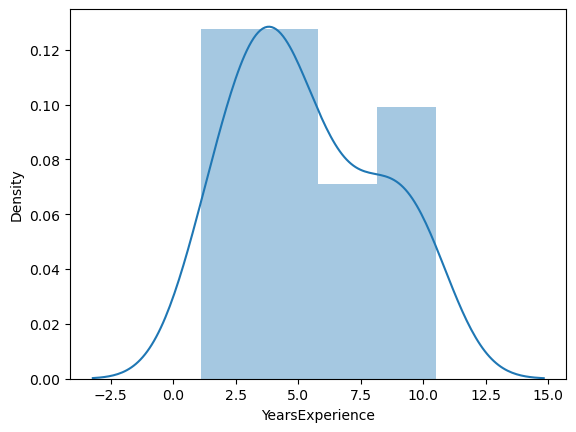

In [34]:
sns.distplot(df1['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

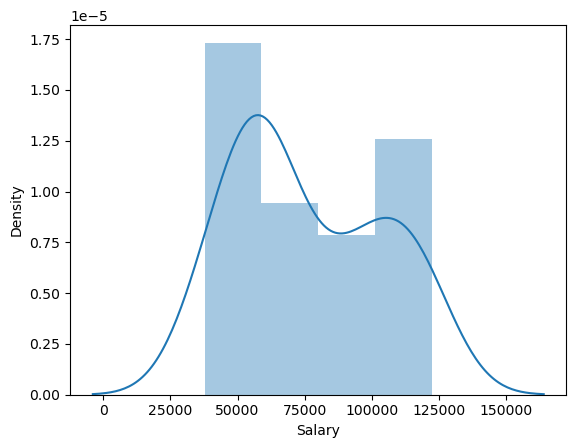

In [35]:
sns.distplot(df1['Salary'])

In [36]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

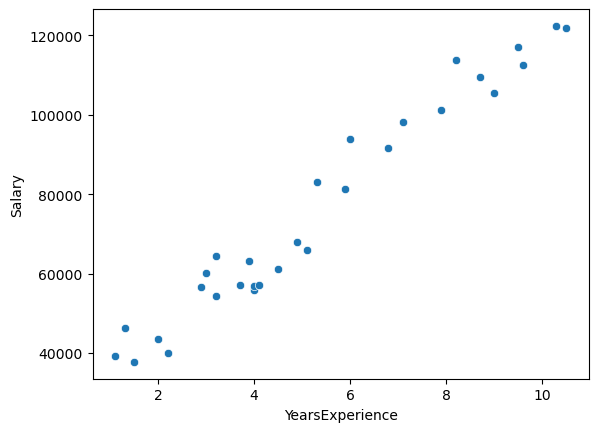

In [37]:
sns.scatterplot(x=df1['YearsExperience'],y=df1['Salary'])

#### Build The Model

In [38]:
model1 = smf.ols("Q('Salary') ~ Q('YearsExperience')", data=df1).fit()

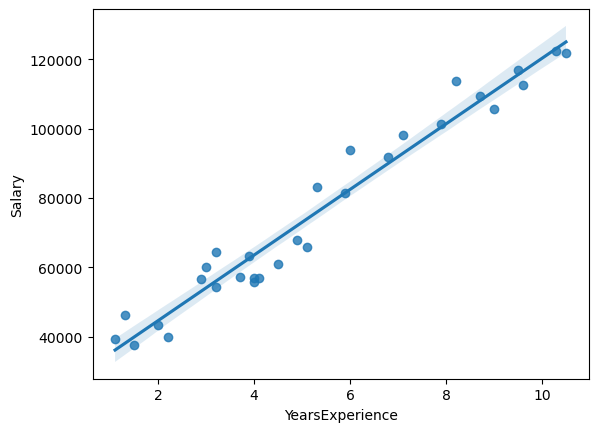

In [39]:
sns.regplot(x="YearsExperience", y="Salary", data=df1);

In [40]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            Q('Salary')   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        19:51:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.579e+04 

#### Predict for New Data

In [41]:
new_df1=pd.Series([11,9.75])

In [42]:
data_pred1=pd.DataFrame(new_df1,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,11.00
1,9.75


In [43]:
#Salary Hike for Input Years Experience
model1.predict(data_pred1)

0    129741.785735
1    117929.332833
dtype: float64

####  Apply Transformations

#### 1. Log Transformation

In [44]:
df1['YearsExperience_log'] = np.log(df1['YearsExperience'])
df1['Salary_log'] = np.log(df1['Salary'])

In [45]:
model1_log = smf.ols("Q('Salary_log') ~ Q('YearsExperience_log')", data=df1).fit()

In [46]:
print(model1_log.summary())

                            OLS Regression Results                            
Dep. Variable:        Q('Salary_log')   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        19:51:42   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 2. Square Root Transformation

In [47]:
df1['YearsExperience_sqrt'] = np.sqrt(df1['YearsExperience'])
df1['Salary_sqrt'] = np.sqrt(df1['Salary'])

In [48]:
model1_sqrt = smf.ols("Q('Salary_sqrt') ~ Q('YearsExperience_sqrt')", data=df1).fit()

In [49]:
print(model1_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:       Q('Salary_sqrt')   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           7.58e-19
Time:                        19:51:42   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### 3 .Standardized Data Transformation

In [50]:
df1[['YearsExperience_std','Salary_std']] = scaler.fit_transform(df1[['YearsExperience','Salary']])

In [51]:
model1_standardized = smf.ols("Q('Salary_std') ~ Q('YearsExperience_std')", data=df1).fit()

In [52]:
print(model1_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:        Q('Salary_std')   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        19:51:42   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 4. Scale the Data (between 0 and 1) 

In [53]:
df1[['YearsExperience_minmax','Salary_minmax']] = min_max_scaler.fit_transform(df1[['YearsExperience','Salary']])

In [54]:
model1_scaled = smf.ols("Q('Salary_minmax') ~ Q('YearsExperience_minmax')", data=df1).fit()

In [55]:
print(model1_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:     Q('Salary_minmax')   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        19:51:42   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         